I have taken only 'gdpp' and 'income' variables and have visualized the models

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### 1) Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from matplotlib.colors import Normalize
from sklearn.metrics import silhouette_score
import seaborn as sns

# sklearn package for machine learning in python:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
plt.style.use("ggplot")
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### 2) Information of dataset

#### 2.1) Import Dataset

In [3]:
df = pd.read_csv('country_data.csv') 
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### 2.2) Remove columns

* Check number of unique values in 'country' column

In [4]:
# Count the number of unique classes
num_classes = df['country'].nunique()

# List the unique classes
unique_classes = df['country'].unique()

print(f"Number of unique classes: {num_classes}")
print(f"Unique classes: {unique_classes}")

Number of unique classes: 167
Unique classes: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' '

It's difficult to get the information from the 'country' column. So, we have to remove that column

In [5]:
# remove 'country' variable
data = df.iloc[:,1:11]

* Information of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


* Check the missing values

In [7]:
# check the missing values
missing_values = data.isna()
missing_counts = missing_values.sum()
missing_counts

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

* Correlation Analysis

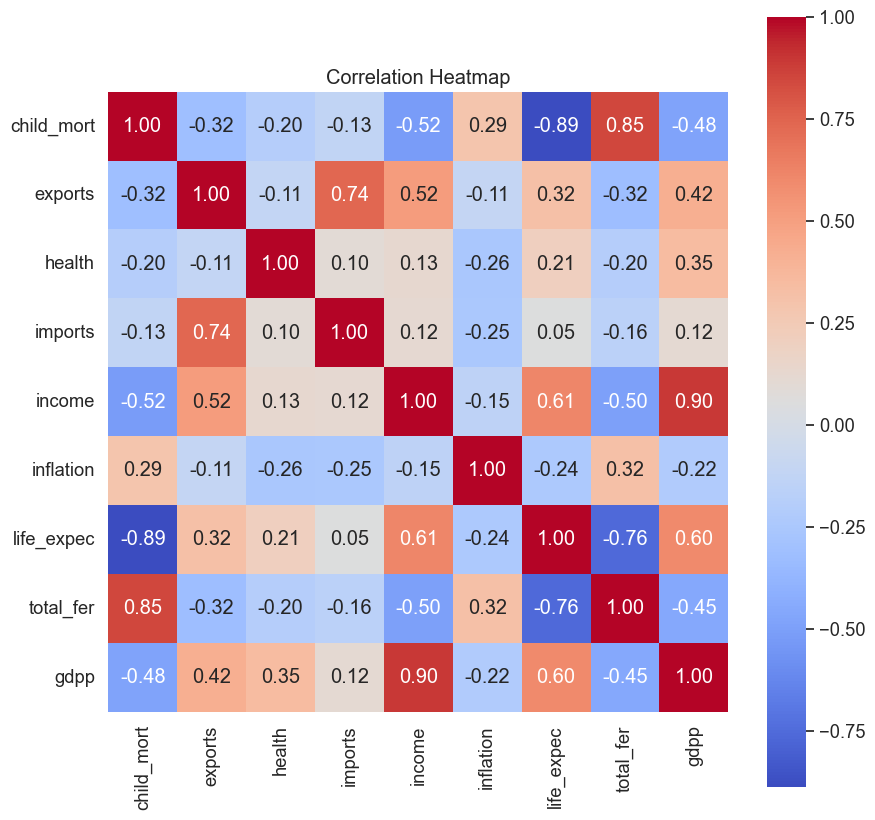

In [8]:
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

Following feature pairs are highly correlated (positively or negatively)

* gdpp and income = 0.9
* child_mort and life_expec = -0.89
* total_fer and child_mort = 0.85
* imports and exports = 0.74
* health and gdpp = 0.35
* inflation and total_fer = 0.32


In [9]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
data_new = data.iloc[:,[8,4]]

* Take all the variables

In [1]:
'''''
# remove 'country' variable
data = df.iloc[:,1:11]
'''''

"''\n# remove 'country' variable\ndata = df.iloc[:,1:11]\n"

### 3) Modeling

In [11]:
X = data_new.values

* Initial data visualization

#### 3.1) KMeans Clustering

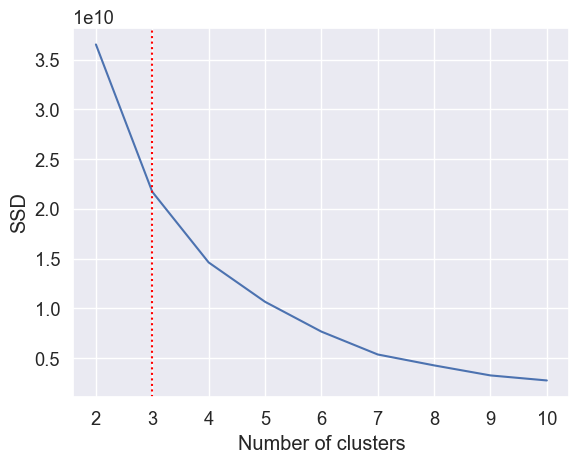

In [12]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(data_new)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

In [13]:
km = KMeans(n_clusters = 3, n_init='auto', random_state=5)
km.fit(data_new)

KMeans(n_clusters=3, n_init='auto', random_state=5)

In [14]:
cluster_centers_km = km.cluster_centers_

# print the centre positions of the clusters
centers_km = km.cluster_centers_
print('Centroids:', centers_km, '\n')

Centroids: [[ 4438.390625    8569.2421875 ]
 [35977.14285714 40908.57142857]
 [84425.         83625.        ]] 



In [15]:
cluster_labels_km = km.fit_predict(X)
silhouette_avg_km = silhouette_score(X, cluster_labels_km)
print(f"Silhouette Score: {silhouette_avg_km}")

Silhouette Score: 0.7106577965477143


In [16]:
data_new.head()

,gdpp,income
0,553,1610
1,4090,9930
2,4460,12900
3,3530,5900
4,12200,19100


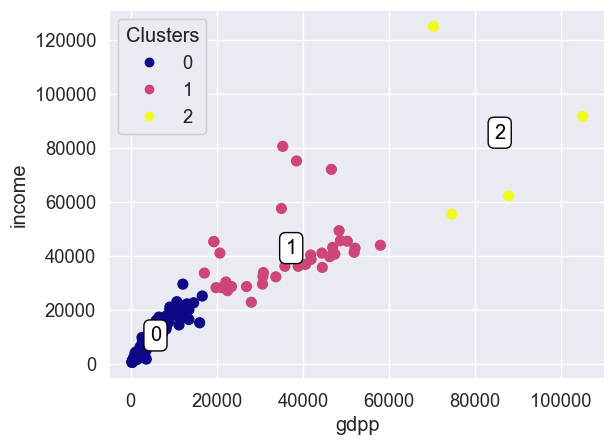

In [31]:
#Visualise the result
fig, ax = plt.subplots()

# store the normalisation of the color encodings 
# based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centers_km)-1)

# plot the clustered data
scatter1 = ax.scatter(X[:, 0], X[:, 1],c = km.predict(X), s = 50, cmap = 'plasma', norm = nm)

# plot the centroids using a for loop
for i in range(centers_km.shape[0]):ax.text(centers_km[i, 0], centers_km[i, 1], str(i), c = 'black',bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))


# make sure you choose the correct column names here!!!
ax.set_xlabel(data_new.columns[0])
ax.set_ylabel(data_new.columns[1])


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

#### 3.2) Mean Shift

In [18]:
# fit the model
ms = MeanShift()
ms.fit(X)

MeanShift()

In [19]:
cluster_centers_ms = ms.cluster_centers_

# print the centre positions of the clusters
centers_ms = ms.cluster_centers_
print('Centroids:', centers_ms, '\n')

Centroids: [[  3495.16521739   7092.72173913]
 [ 43055.55555556  39594.44444444]
 [ 40133.33333333  75966.66666667]
 [105000.          91700.        ]
 [ 87800.          62300.        ]
 [ 74600.          55500.        ]
 [ 70300.         125000.        ]
 [ 35000.          57600.        ]] 



In [20]:
cluster_labels_ms = ms.fit_predict(X)
silhouette_avg_ms = silhouette_score(X, cluster_labels_ms)
print(f"Silhouette Score: {silhouette_avg_ms}")

Silhouette Score: 0.655337972695336


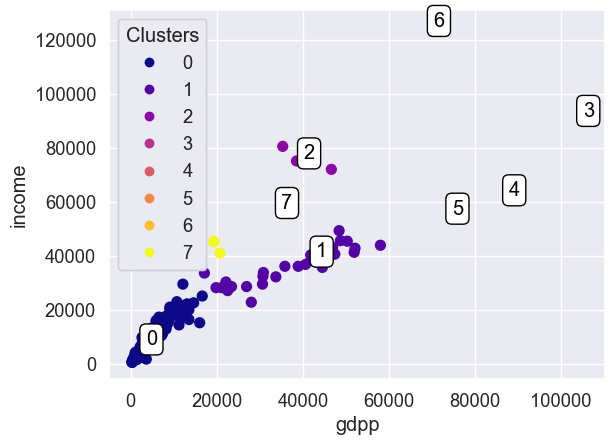

In [21]:
#Visualise the result
fig, ax = plt.subplots()

# store the normalisation of the color encodings 
# based on the number of clusters
nm = Normalize(vmin = 0, vmax = len(centers_ms)-1)

# plot the clustered data
scatter1 = ax.scatter(X[:, 0], X[:, 1],c = ms.predict(X), s = 50, cmap = 'plasma', norm = nm)

# plot the centroids using a for loop
for i in range(centers_ms.shape[0]):ax.text(centers_ms[i, 0], centers_ms[i, 1], str(i), c = 'black',bbox=dict(boxstyle="round", facecolor='white', edgecolor='black'))


# make sure you choose the correct column names here!!!
ax.set_xlabel(data_new.columns[0])
ax.set_ylabel(data_new.columns[1])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

#### 3.3) Hierarchical Clustering

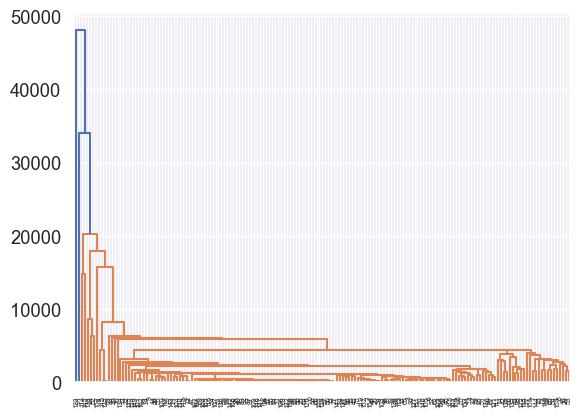

In [28]:
### Hierarchical Clustering from 'single' method
single_h = linkage(data_new, method="single", metric='euclidean')
dendrogram(single_h)
plt.show()

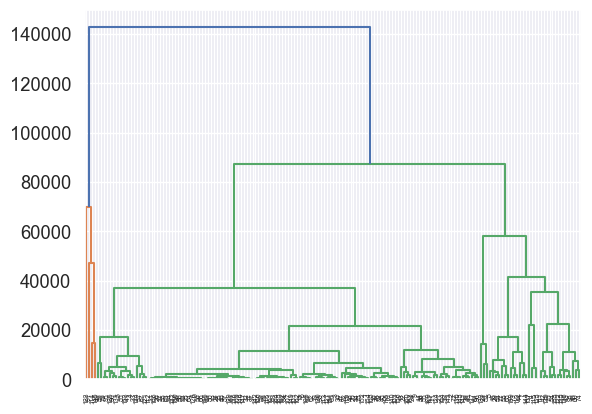

In [22]:
### Hierarchical Clustering from 'complete' method
complete_h = linkage(data_new, method="complete", metric='euclidean')
dendrogram(complete_h)
plt.show()

Let's take 'complete' method clustering to find the performance. Number of clusters is three

In [29]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_new, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7036669945425067


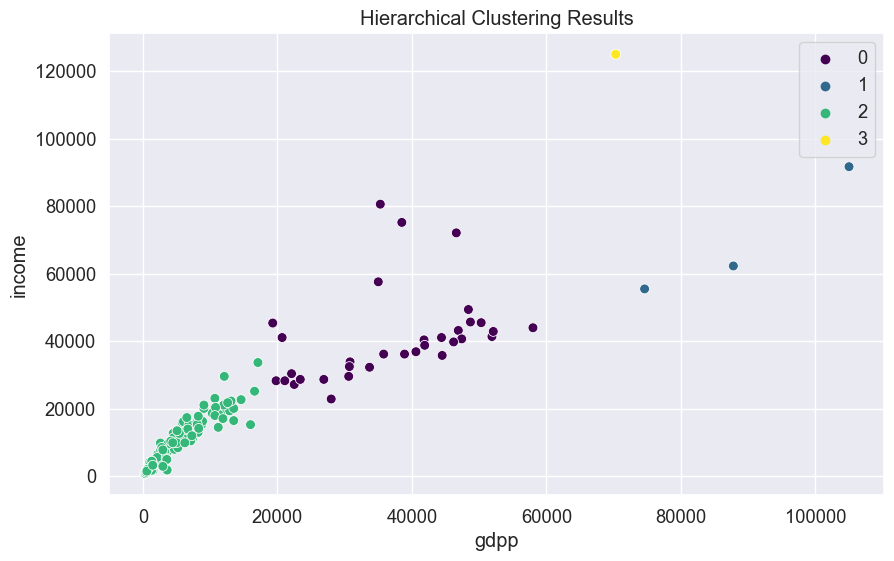

In [30]:
# Visualize the clustered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('gdpp')
plt.ylabel('income')
plt.show()